In [1]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# for Galioma

The type of GAN implemented in the provided code is a basic form of Generative Adversarial Network (GAN). It consists of a simple architecture with fully connected (linear) layers for both the Generator and Discriminator. This type of GAN is sometimes referred to as a Vanilla GAN or a Feedforward GAN.


To improve the image quality and overall performance of the GAN, you can tune the following parameters:

Learning Rate (lr): You have already identified this parameter, and you can experiment with different learning rates to see how it affects the convergence and quality of generated images. Try values like 0.001, 0.01, 0.1, etc., and observe the changes in the loss values and generated images.

Network Architecture: You can experiment with different network architectures for the Generator and Discriminator. You can try increasing the number of hidden layers, changing the number of neurons in each hidden layer, or using different activation functions.

Hidden Layer Size (hidden_dim): The size of the hidden layers in the Generator and Discriminator can be adjusted. You can try increasing or decreasing the number of neurons in each hidden layer to see how it affects the performance.

Batch Size (batch_size): The batch size used during training can also impact the training dynamics and quality of the generated images. Try using different batch sizes to see if it affects the convergence and image quality.

Dropout Rate: The dropout rate can be adjusted to prevent overfitting during training. You can try different dropout rates and see how it impacts the training process and generated images.

Number of Training Epochs (num_epochs): You can increase or decrease the number of training epochs. Too few epochs may result in underfitting, while too many epochs may lead to overfitting. Find an appropriate balance for your specific dataset.

Noise Vector Size (z_size): The size of the noise vector can be adjusted. A larger noise vector can potentially lead to more diverse and detailed generated images.

# 1

# For Generator
self.dropout = nn.Dropout(0.5)

# For Discriminator
self.dropout = nn.Dropout(0.5)

# 2

batch_size = 16

# 3

# For Generator
g_hidden_size = 64

# For Discriminator
d_hidden_size = 64

# 4

z_size = 200

# 5

num_epochs = 200

# 6

lr = 0.01

# For Galioma with Discriminator

Epoch [1/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 1.3896
Epoch [2/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 76.6095
Epoch [3/200] | Batch [1/1] | Gen Loss: 66.6667 | Disc Loss: 100.0000
Epoch [4/200] | Batch [1/1] | Gen Loss: 0.0000 | Disc Loss: 100.0000
Epoch [5/200] | Batch [1/1] | Gen Loss: 66.6667 | Disc Loss: 133.3333
Epoch [6/200] | Batch [1/1] | Gen Loss: 66.6667 | Disc Loss: 166.6667
Epoch [7/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 66.6667
Epoch [8/200] | Batch [1/1] | Gen Loss: 0.0000 | Disc Loss: 100.0000
Epoch [9/200] | Batch [1/1] | Gen Loss: 33.3333 | Disc Loss: 100.0000
Epoch [10/200] | Batch [1/1] | Gen Loss: 66.6667 | Disc Loss: 100.0000
Epoch [11/200] | Batch [1/1] | Gen Loss: 66.6667 | Disc Loss: 100.0000
Epoch [12/200] | Batch [1/1] | Gen Loss: 33.3333 | Disc Loss: 133.3333
Epoch [13/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 66.6667
Epoch [14/200] | Batch [1/1] | Gen Loss: 33.3333 | Disc Loss: 66.6667
Epoch [15/200] | Ba

Epoch [116/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [117/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [118/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [119/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [120/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [121/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [122/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [123/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [124/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [125/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [126/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [127/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [128/200] | Batch [1/1] | Gen Loss: 100.0000 | Disc Loss: 100.0000
Epoch [129/200] | Batch [1/1] | Gen Loss: 100.0000 

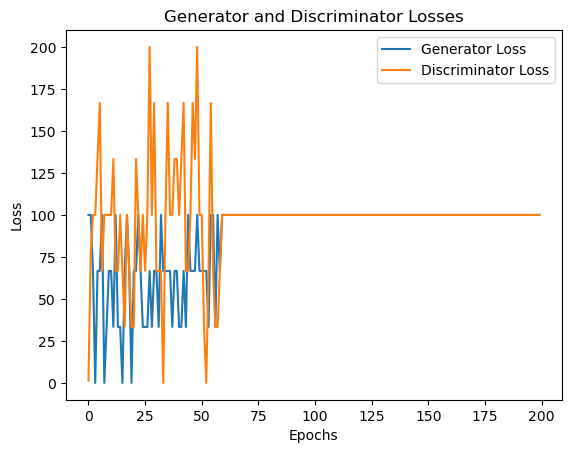

In [5]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms


# Generator class
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim * 4, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with sigmoid applied
        out = F.sigmoid(self.fc4(x))

        return out


# Discriminator class
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim * 4)
        self.fc2 = nn.Linear(hidden_dim * 4, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with sigmoid applied
        out = F.sigmoid(self.fc4(x))

        return out


# Custom Dataset and transformation
class BrainTumorDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_list = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_list[idx])
        image = Image.open(image_path).convert("L")  # Convert to grayscale image
        if self.transform:
            image = self.transform(image)
        return image



# Custom Dataset and transformation
data_folder = r'C:\Users\ADMIN\project soft computing\IPDataForGlioma'
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.Grayscale(),  # Convert to grayscale image
    transforms.ToTensor(),
])
brain_tumor_dataset = BrainTumorDataset(data_folder, transform=transform)

# DataLoader
batch_size = 16  # Reduce the batch size for large images
train_loader = DataLoader(brain_tumor_dataset, batch_size=batch_size, shuffle=True)


# Instantiate the generator with updated input and output size
z_size = 200  # Noise vector size
g_hidden_size = 64
output_size = 1 * 512 * 512  # Update output size for grayscale images
G = Generator(z_size, g_hidden_size, output_size)

# Instantiate the discriminator with updated input and output size
d_input_size = 1 * 512 * 512
d_hidden_size = 64
d_output_size = 1
D = Discriminator(d_input_size, d_hidden_size, d_output_size)

# Optimizers
lr = 0.01
# Set the learning rate
g_optimizer = optim.Adam(G.parameters(), lr=lr)
d_optimizer = optim.Adam(D.parameters(), lr=lr)

# Training hyperparameters
num_epochs = 200  # Set the number of training epochs
sample_size = 16
fixed_z = torch.randn(sample_size, z_size)

# Training loop
G.train()
D.train()
losses_g = []
losses_d = []
criterion = nn.BCELoss()  # Use Binary Cross Entropy (BCE) loss for the discriminator

output_dir = r'C:\Users\ADMIN\project soft computing\new_generated_images_galoma'  # Replace with the desired output directory path

# Training loop
for epoch in range(num_epochs):
    for batch_i, real_images in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1)

        # Train the discriminator with real images
        d_optimizer.zero_grad()
        real_labels = torch.ones(batch_size, d_output_size)
        real_outputs = D(real_images)
        d_loss_real = criterion(real_outputs, real_labels)
        d_loss_real.backward(retain_graph=True)  # Add retain_graph=True here

        # Train the discriminator with fake images generated by the generator
        z = torch.randn(batch_size, z_size)
        fake_images = G(z)
        fake_labels = torch.zeros(batch_size, d_output_size)
        fake_outputs = D(fake_images.detach())  # Detach fake_images from the generator to prevent gradients from propagating to G
        d_loss_fake = criterion(fake_outputs, fake_labels)
        d_loss_fake.backward()

        # Combine the losses and update discriminator's parameters
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.step()

        # Train the generator
        g_optimizer.zero_grad()
        real_labels = torch.ones(batch_size, d_output_size)  # Labels are flipped to trick the generator
        fake_outputs = D(fake_images)
        g_loss = criterion(fake_outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()

        # Print the losses
        if batch_i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Batch [{batch_i + 1}/{len(train_loader)}] | Gen Loss: {g_loss.item():.4f} | Disc Loss: {d_loss.item():.4f}")

    # Save generator and discriminator losses for plotting
    losses_g.append(g_loss.item())
    losses_d.append(d_loss.item())

    # Generate and save sample images every few epochs
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            samples_z = G(fixed_z)
        # Rescale generated images back to the range [0, 1]
        samples_z = (samples_z + 1) / 2

        # Save the generated images
        for i, sample in enumerate(samples_z):
            image_path = os.path.join(output_dir, f"generated_image_epoch{epoch + 1}_sample{i + 1}.png")
            # Reshape the tensor to 2D (512x512)
            sample_image = transforms.ToPILImage()(sample.view(512, 512).cpu())
            sample_image.save(image_path)

        G.train()

# Plot the generator and discriminator losses
plt.plot(losses_g, label="Generator Loss")
plt.plot(losses_d, label="Discriminator Loss")
plt.title("Generator and Discriminator Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# without Discriminator

Epoch [1/100] | Batch [1/1] | Gen Loss: 0.0518
Epoch [2/100] | Batch [1/1] | Gen Loss: 0.0468
Epoch [3/100] | Batch [1/1] | Gen Loss: 0.0463
Epoch [4/100] | Batch [1/1] | Gen Loss: 0.0412
Epoch [5/100] | Batch [1/1] | Gen Loss: 0.0387
Epoch [6/100] | Batch [1/1] | Gen Loss: 0.0375
Epoch [7/100] | Batch [1/1] | Gen Loss: 0.0348
Epoch [8/100] | Batch [1/1] | Gen Loss: 0.0319
Epoch [9/100] | Batch [1/1] | Gen Loss: 0.0309
Epoch [10/100] | Batch [1/1] | Gen Loss: 0.0276
Epoch [11/100] | Batch [1/1] | Gen Loss: 0.0303
Epoch [12/100] | Batch [1/1] | Gen Loss: 0.0248
Epoch [13/100] | Batch [1/1] | Gen Loss: 0.0243
Epoch [14/100] | Batch [1/1] | Gen Loss: 0.0214
Epoch [15/100] | Batch [1/1] | Gen Loss: 0.0186
Epoch [16/100] | Batch [1/1] | Gen Loss: 0.0218
Epoch [17/100] | Batch [1/1] | Gen Loss: 0.0180
Epoch [18/100] | Batch [1/1] | Gen Loss: 0.0172
Epoch [19/100] | Batch [1/1] | Gen Loss: 0.0160
Epoch [20/100] | Batch [1/1] | Gen Loss: 0.0142
Epoch [21/100] | Batch [1/1] | Gen Loss: 0.0164
E

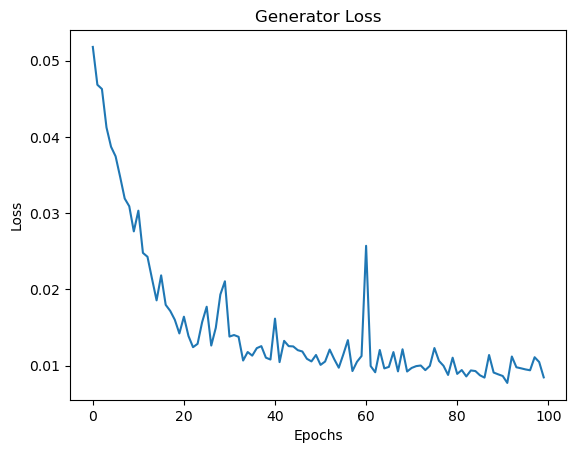

In [10]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


# Generator class
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim * 4, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x))

        return out

# Custom Dataset and transformation
class BrainTumorDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_list = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_list[idx])
        image = Image.open(image_path).convert("L")  # Convert to grayscale image
        if self.transform:
            image = self.transform(image)
        return image

# Specify the class name for which you want to generate images
class_name = "Glioma"  # Replace this with the desired class name ("glioma", "meningioma", "notumor", "pituitary")

# Custom Dataset and transformation
data_folder = r'C:\Users\ADMIN\project soft computing\IPDataForGlioma'
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.Grayscale(),  # Convert to grayscale image
    transforms.ToTensor(),
])
brain_tumor_dataset = BrainTumorDataset(data_folder, transform=transform)

# DataLoader
batch_size = 8  # Reduce the batch size for large images
train_loader = DataLoader(brain_tumor_dataset, batch_size=batch_size, shuffle=True)


# Instantiate the generator with updated input and output size
z_size = 100  # Noise vector size
g_hidden_size = 32
output_size = 1 * 512 * 512  # Update output size for grayscale images
G = Generator(z_size, g_hidden_size, output_size)

# Optimizer
lr = 0.002
g_optimizer = optim.Adam(G.parameters(), lr)

# Training hyperparameters
num_epochs = 100  # Set the number of training epochs
sample_size = 16
fixed_z = torch.randn(sample_size, z_size)


# Training loop
G.train()
losses = []
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) loss

output_dir = f"generated_images_{class_name}"
os.makedirs(output_dir, exist_ok=True)

for epoch in range(num_epochs):
    for batch_i, real_images in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1)

        # Train the generator
        g_optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(batch_size, z_size)
        fake_images = G(z)

        # Reshape and resize fake_images to have the same shape as real_images
        fake_images = fake_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]
        real_images = real_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]

        # Calculate generator loss
        g_loss = criterion(fake_images, real_images)

        # Perform backpropagation and optimization step
        g_loss.backward()
        g_optimizer.step()

        # Print the generator loss
        if batch_i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Batch [{batch_i + 1}/{len(train_loader)}] | Gen Loss: {g_loss.item():.4f}")

    # Save generator loss for plotting
    losses.append(g_loss.item())

    # Generate and save sample images every few epochs
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            samples_z = G(fixed_z)
        # Rescale generated images back to the range [0, 1]
        samples_z = (samples_z + 1) / 2

        # Save the generated images
        for i, sample in enumerate(samples_z):
            image_path = os.path.join(output_dir, f"generated_image_epoch{epoch + 1}_sample{i + 1}.png")
            # Reshape the tensor to 2D (512x512)
            sample_image = transforms.ToPILImage()(sample.view(512, 512).cpu())
            sample_image.save(image_path)

        G.train()

# Plot the generator loss
plt.plot(losses)
plt.title("Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


# for Meningioma

Epoch [1/100] | Batch [1/1] | Gen Loss: 0.0758
Epoch [2/100] | Batch [1/1] | Gen Loss: 0.0720
Epoch [3/100] | Batch [1/1] | Gen Loss: 0.0657
Epoch [4/100] | Batch [1/1] | Gen Loss: 0.0631
Epoch [5/100] | Batch [1/1] | Gen Loss: 0.0608
Epoch [6/100] | Batch [1/1] | Gen Loss: 0.0585
Epoch [7/100] | Batch [1/1] | Gen Loss: 0.0551
Epoch [8/100] | Batch [1/1] | Gen Loss: 0.0531
Epoch [9/100] | Batch [1/1] | Gen Loss: 0.0462
Epoch [10/100] | Batch [1/1] | Gen Loss: 0.0508
Epoch [11/100] | Batch [1/1] | Gen Loss: 0.0454
Epoch [12/100] | Batch [1/1] | Gen Loss: 0.0396
Epoch [13/100] | Batch [1/1] | Gen Loss: 0.0376
Epoch [14/100] | Batch [1/1] | Gen Loss: 0.0377
Epoch [15/100] | Batch [1/1] | Gen Loss: 0.0364
Epoch [16/100] | Batch [1/1] | Gen Loss: 0.0316
Epoch [17/100] | Batch [1/1] | Gen Loss: 0.0256
Epoch [18/100] | Batch [1/1] | Gen Loss: 0.0254
Epoch [19/100] | Batch [1/1] | Gen Loss: 0.0232
Epoch [20/100] | Batch [1/1] | Gen Loss: 0.0230
Epoch [21/100] | Batch [1/1] | Gen Loss: 0.0206
E

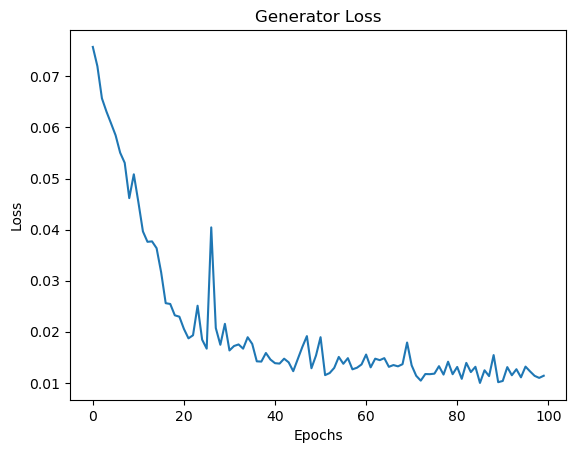

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


# Generator class
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim * 4, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x))

        return out

# Custom Dataset and transformation
class BrainTumorDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_list = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_list[idx])
        image = Image.open(image_path).convert("L")  # Convert to grayscale image
        if self.transform:
            image = self.transform(image)
        return image

# Specify the class name for which you want to generate images
class_name = "Meningioma"  # Replace this with the desired class name ("glioma", "meningioma", "notumor", "pituitary")

# Custom Dataset and transformation
data_folder = r'C:\Users\ADMIN\project soft computing\IPDataForMeningioma'
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.Grayscale(),  # Convert to grayscale image
    transforms.ToTensor(),
])
brain_tumor_dataset = BrainTumorDataset(data_folder, transform=transform)

# DataLoader
batch_size = 8  # Reduce the batch size for large images
train_loader = DataLoader(brain_tumor_dataset, batch_size=batch_size, shuffle=True)


# Instantiate the generator with updated input and output size
z_size = 100  # Noise vector size
g_hidden_size = 32
output_size = 1 * 512 * 512  # Update output size for grayscale images
G = Generator(z_size, g_hidden_size, output_size)

# Optimizer
lr = 0.002
g_optimizer = optim.Adam(G.parameters(), lr)

# Training hyperparameters
num_epochs = 100  # Set the number of training epochs
sample_size = 16
fixed_z = torch.randn(sample_size, z_size)


# Training loop
G.train()
losses = []
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) loss

output_dir = f"generated_images_{class_name}"
os.makedirs(output_dir, exist_ok=True)

for epoch in range(num_epochs):
    for batch_i, real_images in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1)

        # Train the generator
        g_optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(batch_size, z_size)
        fake_images = G(z)

        # Reshape and resize fake_images to have the same shape as real_images
        fake_images = fake_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]
        real_images = real_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]

        # Calculate generator loss
        g_loss = criterion(fake_images, real_images)

        # Perform backpropagation and optimization step
        g_loss.backward()
        g_optimizer.step()

        # Print the generator loss
        if batch_i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Batch [{batch_i + 1}/{len(train_loader)}] | Gen Loss: {g_loss.item():.4f}")

    # Save generator loss for plotting
    losses.append(g_loss.item())

    # Generate and save sample images every few epochs
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            samples_z = G(fixed_z)
        # Rescale generated images back to the range [0, 1]
        samples_z = (samples_z + 1) / 2

        # Save the generated images
        for i, sample in enumerate(samples_z):
            image_path = os.path.join(output_dir, f"generated_image_epoch{epoch + 1}_sample{i + 1}.png")
            # Reshape the tensor to 2D (512x512)
            sample_image = transforms.ToPILImage()(sample.view(512, 512).cpu())
            sample_image.save(image_path)

        G.train()

# Plot the generator loss
plt.plot(losses)
plt.title("Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


# for Notumor

Epoch [1/100] | Batch [1/1] | Gen Loss: 0.0699
Epoch [2/100] | Batch [1/1] | Gen Loss: 0.0663
Epoch [3/100] | Batch [1/1] | Gen Loss: 0.0626
Epoch [4/100] | Batch [1/1] | Gen Loss: 0.0593
Epoch [5/100] | Batch [1/1] | Gen Loss: 0.0585
Epoch [6/100] | Batch [1/1] | Gen Loss: 0.0538
Epoch [7/100] | Batch [1/1] | Gen Loss: 0.0519
Epoch [8/100] | Batch [1/1] | Gen Loss: 0.0518
Epoch [9/100] | Batch [1/1] | Gen Loss: 0.0439
Epoch [10/100] | Batch [1/1] | Gen Loss: 0.0458
Epoch [11/100] | Batch [1/1] | Gen Loss: 0.0393
Epoch [12/100] | Batch [1/1] | Gen Loss: 0.0363
Epoch [13/100] | Batch [1/1] | Gen Loss: 0.0414
Epoch [14/100] | Batch [1/1] | Gen Loss: 0.0345
Epoch [15/100] | Batch [1/1] | Gen Loss: 0.0396
Epoch [16/100] | Batch [1/1] | Gen Loss: 0.0309
Epoch [17/100] | Batch [1/1] | Gen Loss: 0.0283
Epoch [18/100] | Batch [1/1] | Gen Loss: 0.0275
Epoch [19/100] | Batch [1/1] | Gen Loss: 0.0257
Epoch [20/100] | Batch [1/1] | Gen Loss: 0.0321
Epoch [21/100] | Batch [1/1] | Gen Loss: 0.0343
E

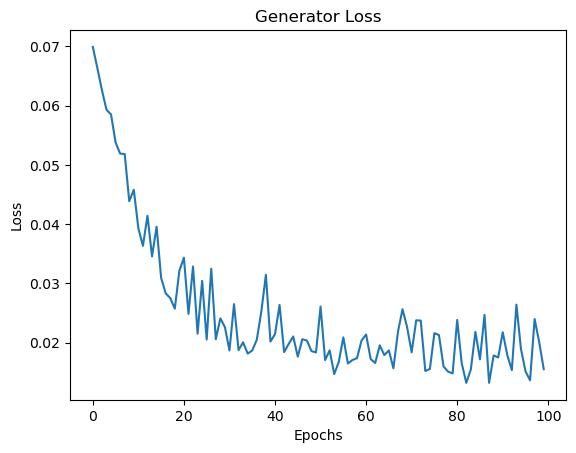

In [8]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


# Generator class
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim * 4, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x))

        return out

# Custom Dataset and transformation
class BrainTumorDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_list = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_list[idx])
        image = Image.open(image_path).convert("L")  # Convert to grayscale image
        if self.transform:
            image = self.transform(image)
        return image

# Specify the class name for which you want to generate images
class_name = "Notumor"  # Replace this with the desired class name ("glioma", "meningioma", "notumor", "pituitary")

# Custom Dataset and transformation
data_folder = r'C:\Users\ADMIN\project soft computing\IPDataForNotumor'
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.Grayscale(),  # Convert to grayscale image
    transforms.ToTensor(),
])
brain_tumor_dataset = BrainTumorDataset(data_folder, transform=transform)

# DataLoader
batch_size = 8  # Reduce the batch size for large images
train_loader = DataLoader(brain_tumor_dataset, batch_size=batch_size, shuffle=True)


# Instantiate the generator with updated input and output size
z_size = 100  # Noise vector size
g_hidden_size = 32
output_size = 1 * 512 * 512  # Update output size for grayscale images
G = Generator(z_size, g_hidden_size, output_size)

# Optimizer
lr = 0.002
g_optimizer = optim.Adam(G.parameters(), lr)

# Training hyperparameters
num_epochs = 100  # Set the number of training epochs
sample_size = 16
fixed_z = torch.randn(sample_size, z_size)

# ... (Rest of the code remains the same)

# Training loop
G.train()
losses = []
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) loss

output_dir = f"generated_images_{class_name}"
os.makedirs(output_dir, exist_ok=True)

for epoch in range(num_epochs):
    for batch_i, real_images in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1)

        # Train the generator
        g_optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(batch_size, z_size)
        fake_images = G(z)

        # Reshape and resize fake_images to have the same shape as real_images
        fake_images = fake_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]
        real_images = real_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]

        # Calculate generator loss
        g_loss = criterion(fake_images, real_images)

        # Perform backpropagation and optimization step
        g_loss.backward()
        g_optimizer.step()

        # Print the generator loss
        if batch_i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Batch [{batch_i + 1}/{len(train_loader)}] | Gen Loss: {g_loss.item():.4f}")

    # Save generator loss for plotting
    losses.append(g_loss.item())

    # Generate and save sample images every few epochs
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            samples_z = G(fixed_z)
        # Rescale generated images back to the range [0, 1]
        samples_z = (samples_z + 1) / 2

        # Save the generated images
        for i, sample in enumerate(samples_z):
            image_path = os.path.join(output_dir, f"generated_image_epoch{epoch + 1}_sample{i + 1}.png")
            # Reshape the tensor to 2D (512x512)
            sample_image = transforms.ToPILImage()(sample.view(512, 512).cpu())
            sample_image.save(image_path)

        G.train()

# Plot the generator loss
plt.plot(losses)
plt.title("Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


# for Pituitaryt

Epoch [1/100] | Batch [1/1] | Gen Loss: 0.0854
Epoch [2/100] | Batch [1/1] | Gen Loss: 0.0797
Epoch [3/100] | Batch [1/1] | Gen Loss: 0.0746
Epoch [4/100] | Batch [1/1] | Gen Loss: 0.0714
Epoch [5/100] | Batch [1/1] | Gen Loss: 0.0665
Epoch [6/100] | Batch [1/1] | Gen Loss: 0.0599
Epoch [7/100] | Batch [1/1] | Gen Loss: 0.0574
Epoch [8/100] | Batch [1/1] | Gen Loss: 0.0518
Epoch [9/100] | Batch [1/1] | Gen Loss: 0.0449
Epoch [10/100] | Batch [1/1] | Gen Loss: 0.0390
Epoch [11/100] | Batch [1/1] | Gen Loss: 0.0379
Epoch [12/100] | Batch [1/1] | Gen Loss: 0.0305
Epoch [13/100] | Batch [1/1] | Gen Loss: 0.0311
Epoch [14/100] | Batch [1/1] | Gen Loss: 0.0272
Epoch [15/100] | Batch [1/1] | Gen Loss: 0.0234
Epoch [16/100] | Batch [1/1] | Gen Loss: 0.0232
Epoch [17/100] | Batch [1/1] | Gen Loss: 0.0229
Epoch [18/100] | Batch [1/1] | Gen Loss: 0.0209
Epoch [19/100] | Batch [1/1] | Gen Loss: 0.0209
Epoch [20/100] | Batch [1/1] | Gen Loss: 0.0172
Epoch [21/100] | Batch [1/1] | Gen Loss: 0.0203
E

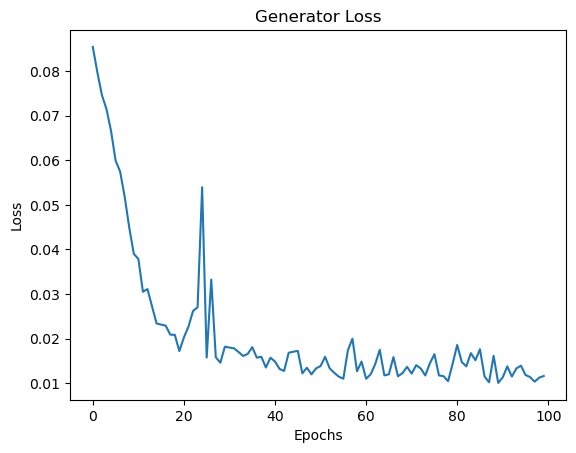

In [9]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


# Generator class
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim * 4, output_size)
        # dropout layer
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x))

        return out

# Custom Dataset and transformation
class BrainTumorDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_list = os.listdir(data_folder)
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_list[idx])
        image = Image.open(image_path).convert("L")  # Convert to grayscale image
        if self.transform:
            image = self.transform(image)
        return image

# Specify the class name for which you want to generate images
class_name = "Pituitaryt"  # Replace this with the desired class name ("glioma", "meningioma", "notumor", "pituitary")

# Custom Dataset and transformation
data_folder = r'C:\Users\ADMIN\project soft computing\IPDataForPituitaryt'
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.Grayscale(),  # Convert to grayscale image
    transforms.ToTensor(),
])
brain_tumor_dataset = BrainTumorDataset(data_folder, transform=transform)

# DataLoader
batch_size = 8  # Reduce the batch size for large images
train_loader = DataLoader(brain_tumor_dataset, batch_size=batch_size, shuffle=True)

# ... (Rest of the code remains the same)

# Instantiate the generator with updated input and output size
z_size = 100  # Noise vector size
g_hidden_size = 32
output_size = 1 * 512 * 512  # Update output size for grayscale images
G = Generator(z_size, g_hidden_size, output_size)

# Optimizer
lr = 0.002
g_optimizer = optim.Adam(G.parameters(), lr)

# ... (Rest of the code remains the same)
# Training hyperparameters
num_epochs = 100  # Set the number of training epochs
sample_size = 16
fixed_z = torch.randn(sample_size, z_size)

# ... (Rest of the code remains the same)

# Training loop
G.train()
losses = []
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) loss

output_dir = f"generated_images_{class_name}"
os.makedirs(output_dir, exist_ok=True)

for epoch in range(num_epochs):
    for batch_i, real_images in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1)

        # Train the generator
        g_optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(batch_size, z_size)
        fake_images = G(z)

        # Reshape and resize fake_images to have the same shape as real_images
        fake_images = fake_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]
        real_images = real_images.view(batch_size, 1, 512, 512)  # Reshape to [batch_size, 1, 512, 512]

        # Calculate generator loss
        g_loss = criterion(fake_images, real_images)

        # Perform backpropagation and optimization step
        g_loss.backward()
        g_optimizer.step()

        # Print the generator loss
        if batch_i % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] | Batch [{batch_i + 1}/{len(train_loader)}] | Gen Loss: {g_loss.item():.4f}")

    # Save generator loss for plotting
    losses.append(g_loss.item())

    # Generate and save sample images every few epochs
    if (epoch + 1) % 10 == 0:
        G.eval()
        with torch.no_grad():
            samples_z = G(fixed_z)
        # Rescale generated images back to the range [0, 1]
        samples_z = (samples_z + 1) / 2

        # Save the generated images
        for i, sample in enumerate(samples_z):
            image_path = os.path.join(output_dir, f"generated_image_epoch{epoch + 1}_sample{i + 1}.png")
            # Reshape the tensor to 2D (512x512)
            sample_image = transforms.ToPILImage()(sample.view(512, 512).cpu())
            sample_image.save(image_path)

        G.train()

# Plot the generator loss
plt.plot(losses)
plt.title("Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
